# Delta Airline PCA and Clustering

## Data Processing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import plotly.express as px
# %matplotlib inline
import warnings
warnings.filterwarnings('ignore') # Ignore warnings

In [5]:
delta_data = pd.read_csv('delta.csv', index_col=0).reset_index()
delta_data.head()

,Aircraft,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
0,Airbus A319,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
1,Airbus A319 VIP,19.4,44,12,19.4,40.0,28,21.0,59.0,14,...,1,0,0,0,0,1,1,1,0,0
2,Airbus A320,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
3,Airbus A320 32-R,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
4,Airbus A330-200,0.0,0,0,0.0,0.0,0,21.0,60.0,32,...,1,1,0,1,0,0,0,1,1,1


## Correlation

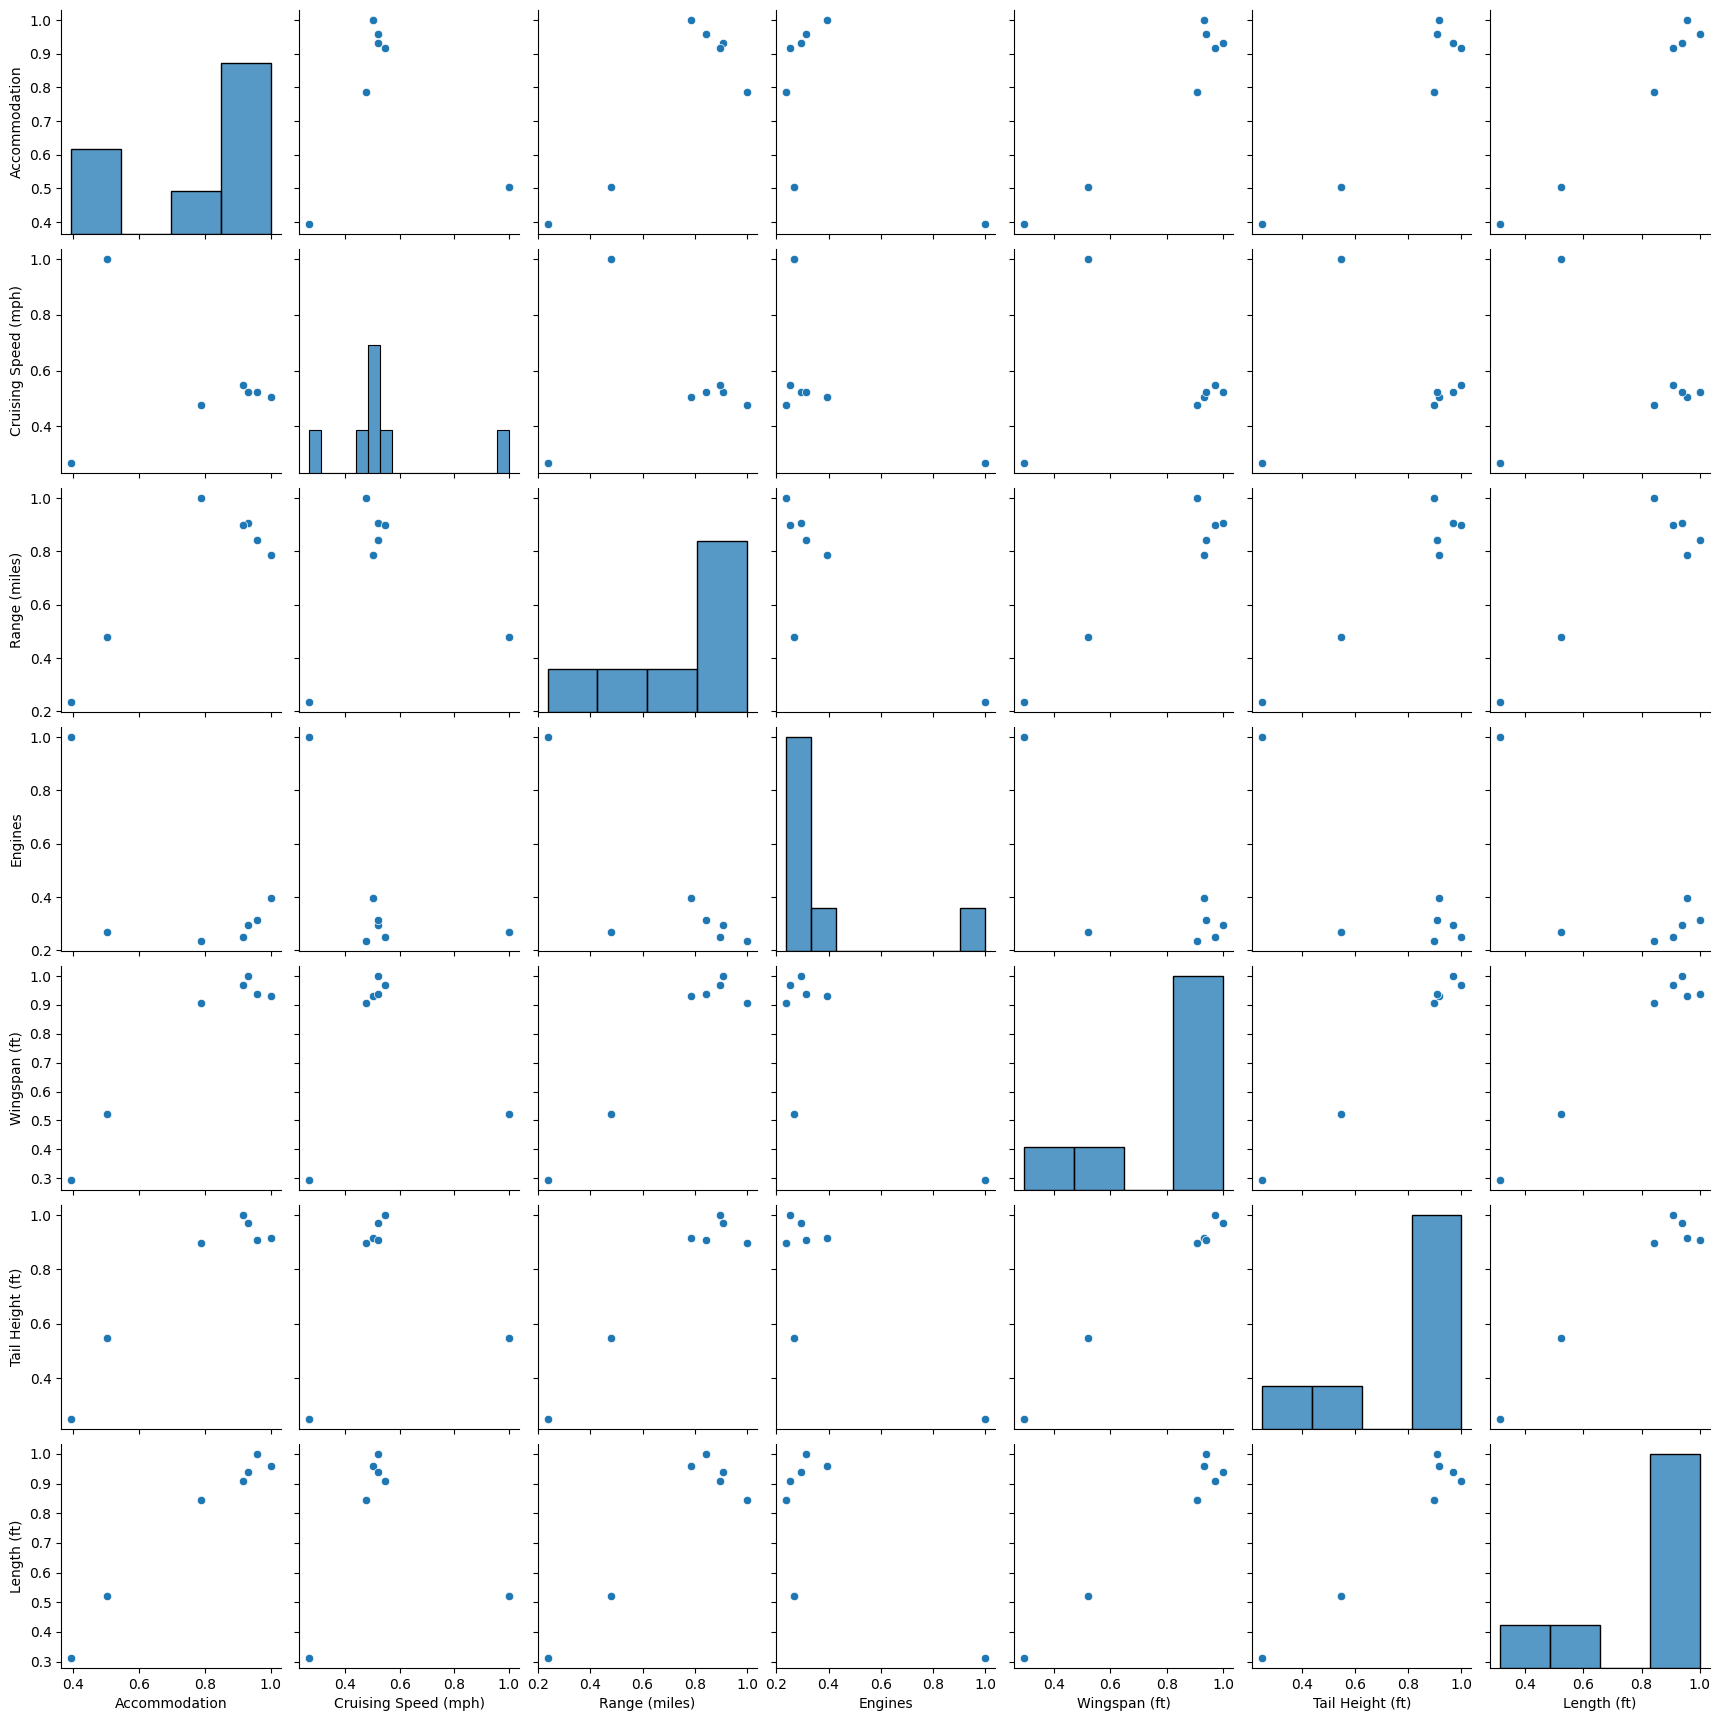

In [6]:
corr = delta_data[['Accommodation', 'Cruising Speed (mph)', 'Range (miles)', 'Engines', 'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)']].corr()
sns.pairplot(corr)

In [7]:
#  Identify binary columns
binary = delta_data.columns[delta_data.isin([0,1]).all()]
binary

Index(['Wifi', 'Video', 'Power', 'Satellite', 'Flat-bed', 'Sleeper', 'Club',
       'First Class', 'Business', 'Eco Comfort', 'Economy'],
      dtype='object')

In [8]:
#  Generate a new dataframe X removing these binary columns and column Aircraft(y)
newdf = delta_data.drop(columns = ['Wifi', 'Video', 'Power', 'Satellite', 'Flat-bed', 'Sleeper', 'Club',
       'First Class', 'Business', 'Eco Comfort', 'Economy'])
X = newdf.drop(columns = ['Aircraft'])
X

,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),Seat Width (Eco Comfort),...,Seat Width (Economy),Seat Pitch (Economy),Seats (Economy),Accommodation,Cruising Speed (mph),Range (miles),Engines,Wingspan (ft),Tail Height (ft),Length (ft)
0,0.0,0,0,21.0,36.0,12,0.0,0.00,0,17.20,...,17.20,30.5,96,126,517,2399,2,111.830,38.5830,111.000
1,19.4,44,12,19.4,40.0,28,21.0,59.00,14,0.00,...,0.00,0.0,0,54,517,3119,2,111.830,38.5830,111.000
2,0.0,0,0,21.0,36.0,12,0.0,0.00,0,17.20,...,17.20,31.5,120,150,517,2420,2,111.830,38.5830,123.250
3,0.0,0,0,21.0,36.0,12,0.0,0.00,0,17.20,...,17.20,31.5,120,150,517,2420,2,111.830,38.5830,123.250
4,0.0,0,0,0.0,0.0,0,21.0,60.00,32,18.00,...,18.00,30.5,181,243,531,6536,2,197.830,59.8300,188.670
5,0.0,0,0,0.0,0.0,0,21.0,80.00,34,18.00,...,18.00,30.5,168,243,531,6536,2,197.830,59.8300,188.670
6,0.0,0,0,0.0,0.0,0,21.0,80.00,34,18.00,...,18.00,30.5,227,293,531,5343,2,197.830,56.3300,208.830
7,0.0,0,0,0.0,0.0,0,20.0,60.00,34,18.00,...,18.00,30.5,232,298,531,5343,2,197.830,56.3300,208.830
8,0.0,0,0,19.6,37.0,12,0.0,0.00,0,18.10,...,18.10,31.0,83,110,504,1510,2,93.330,29.0830,120.000
9,0.0,0,0,21.0,37.0,12,0.0,0.00,0,17.20,...,17.20,30.5,94,124,517,2925,2,117.416,41.1670,110.330


## PCA

In [10]:
# Standardize X
X_normalized = StandardScaler().fit(X).transform(X)

In [11]:
# conduct PCA
pca = PCA().fit(X_normalized)

In [12]:
# calculate the amount of variance each principal component explain
exp_var = pca.explained_variance_ratio_ 
exp_var 

array([4.63148487e-01, 2.51071052e-01, 1.61265689e-01, 4.68733864e-02,
       3.60892657e-02, 1.84418981e-02, 9.47340752e-03, 4.34022199e-03,
       3.28954319e-03, 1.43450053e-03, 1.20846026e-03, 9.51526552e-04,
       7.88782498e-04, 6.43276642e-04, 3.88597783e-04, 2.71942151e-04,
       1.68280380e-04, 1.11848384e-04, 2.93264482e-05, 1.05081889e-05,
       4.69591455e-33, 9.31549368e-35])

In [13]:
# calculate the amount of cumulative sum
exp_var_cumsum = np.cumsum(exp_var)
exp_var_cumsum

array([0.46314849, 0.71421954, 0.87548523, 0.92235861, 0.95844788,
       0.97688978, 0.98636318, 0.99070341, 0.99399295, 0.99542745,
       0.99663591, 0.99758744, 0.99837622, 0.9990195 , 0.99940809,
       0.99968004, 0.99984832, 0.99996017, 0.99998949, 1.        ,
       1.        , 1.        ])

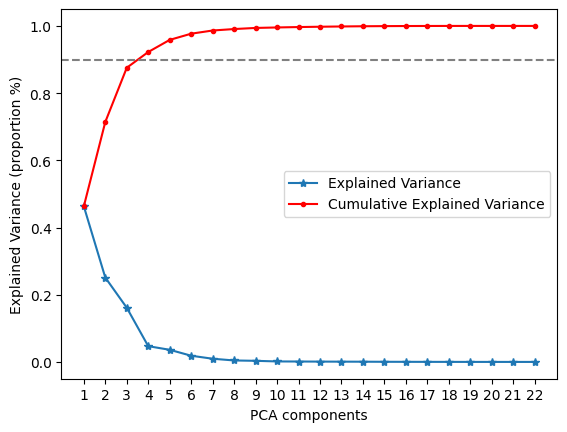

In [14]:
# Choose component = 4 (cum sum of explained variance > 90%)

plt.plot(range(1, len(exp_var)+1), exp_var,'*-',label='Explained Variance')
plt.plot(range(1, len(exp_var)+1), exp_var_cumsum,'r.-',label='Cumulative Explained Variance')

plt.legend()
ax = plt.gca()
ax.set_xticks(np.arange(1, len(exp_var)+1, 1))
ax.set_xlabel('PCA components')
ax.set_ylabel('Explained Variance (proportion %)')

plt.axhline(0.9, linestyle='--', color='grey')

In [15]:
# pick components = 4 (explain more than 90%)
pca = PCA(n_components=4)
components = pca.fit_transform(X_normalized)
components_normalized = MinMaxScaler().fit(components).transform(components)

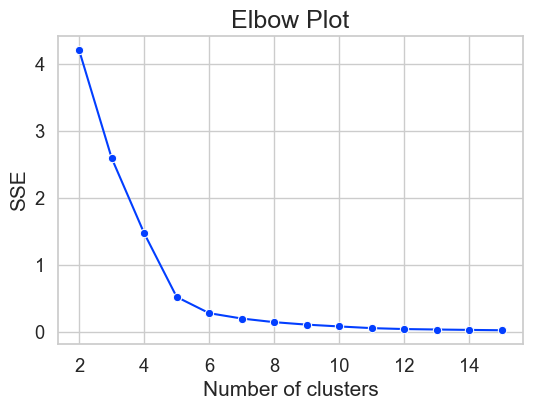

In [16]:
# Using components as the input, run k-means for k from 2 to 15 (with random_state=1), and visualize SSE by elbow curve.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

def plot_elbow_curve(start, end, data):
    no_of_clusters = list(range(start, end+1))
    score_values = []

    for k in no_of_clusters:
        km_model = KMeans(n_clusters=k, random_state= 1)
        km_model.fit(components_normalized)
        score_values.append(-km_model.score(components_normalized))

    sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
    plt.figure(figsize=(6, 4))
    ax = sns.lineplot(x=no_of_clusters, y=score_values, marker="o", dashes=False)
    ax.set_title('Elbow Plot', fontsize=18)
    ax.set_xlabel('Number of clusters', fontsize=15)
    ax.set_ylabel('SSE', fontsize=15)
    plt.plot()

# Plotting elbow curve for k=2 to k=15
plot_elbow_curve(start=2,end=15,data = components_normalized)

## Kmeans Clustering

In [17]:
# select k=5 using elbow curve and run clustering with the selected k to get the cluster assignment
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state=1)
cl_assignment = kmeans.fit_predict(components_normalized)
cl_assignment

array([1, 4, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

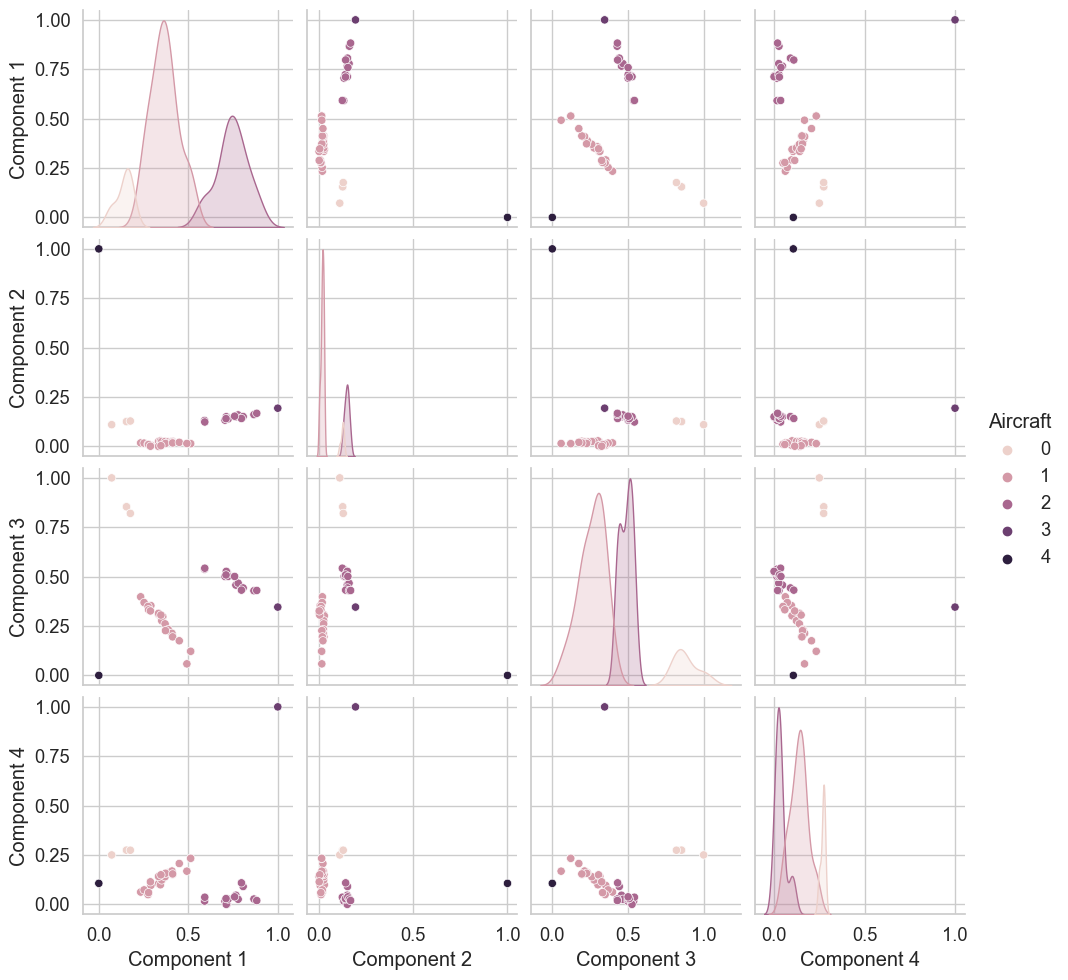

In [18]:
# Visualize the cluster membership by scatter plots (for each pair of principle components as x and y axes)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

comp_df = pd.DataFrame(components_normalized,columns=['Component 1','Component 2','Component 3','Component 4'])
comp_df['Aircraft']=cl_assignment
sns.pairplot(comp_df,hue='Aircraft')